This notebook illustrates how to use CompEcon Toolbox routines to construct and operate with an approximant for a function defined on a rectangle in $R^2$.

In particular, we construct an approximant for 
$$f(x_1,x_2) = \frac{\cos(x_1)}{\exp(x_2)}$$
on $[-1,1]\times[-1,1]$.  The function used in this illustration posseses a closed-form, which will allow us to measure approximation error precisely. Of course, in practical applications, the function to be approximated will not possess a known closed-form.

In order to carry out the exercise, one must first code the function to be approximated at arbitrary points.

In [1]:
import numpy as np
from numpy.linalg import norm, cond
np.set_printoptions(precision=4, linewidth=120, suppress=True)
from compecon import Basis, BasisChebyshev, Interpolator
from compecon.tools import nodeunif
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#from matplotlib import rcParams as settings
import seaborn as sns
sns.set_style('dark')
%matplotlib notebook

C:\Program Files\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Function to be approximated

In [2]:
f = lambda x: np.sin(x[0]) / np.exp(x[1])

Set the points of approximation interval:

In [3]:
a = [-1, -1] # left points
b = [ 1,  1] # right points

Choose an approximation scheme. In this case, let us use an 11 by 11 Chebychev approximation scheme:

In [4]:
n = [11, 11] # order of approximation
basis = Basis(n, a, b, type='chebyshev')

## Compute the basis coefficients c.  
There are various way to do this:

* One may compute the standard approximation nodes x and corresponding interpolation matrix Phi and function values y and use:

In [5]:
x = basis.nodes
Phi = basis.interpolation(x)  # input x may be omitted if evaluating at the basis nodes
y = f(x)
c = np.linalg.solve(Phi, y)
print('Interpolation coeff =\n ', c)

Interpolation coeff =
  [ 0.      0.      0.      0.     -0.      0.      0.      0.      0.     -0.     -0.      1.1143 -0.9948  0.2389 -0.039
  0.0048 -0.0005  0.     -0.      0.     -0.      0.      0.     -0.     -0.      0.     -0.      0.     -0.      0.     -0.
 -0.     -0.     -0.0495  0.0442 -0.0106  0.0017 -0.0002  0.     -0.      0.     -0.      0.     -0.      0.      0.     -0.
 -0.     -0.     -0.      0.      0.     -0.      0.      0.      0.0006 -0.0006  0.0001 -0.      0.     -0.      0.     -0.
  0.     -0.      0.      0.      0.     -0.     -0.      0.     -0.      0.     -0.      0.      0.      0.     -0.      0.
 -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.     -0.     -0.      0.     -0.      0.
 -0.     -0.     -0.      0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.
 -0.     -0.      0.      0.      0.     -0.      0.     -0.     -0.     -0.    ]


* Alternatively, one may compute the standard approximation nodes x and corresponding function values y and use these values to create an Interpolator object:

In [6]:
x = basis.nodes
y = f(x)
fa = Interpolator(basis, y=y)
print('Interpolation coeff =\n ', fa.c)  # attribute c returns the coefficients

Interpolation coeff =
  [-0.      0.     -0.     -0.     -0.      0.      0.      0.      0.     -0.      0.      1.1143 -0.9948  0.2389 -0.039
  0.0048 -0.0005  0.     -0.      0.     -0.      0.     -0.      0.      0.     -0.     -0.      0.      0.      0.     -0.
 -0.     -0.     -0.0495  0.0442 -0.0106  0.0017 -0.0002  0.     -0.      0.     -0.      0.     -0.      0.      0.     -0.
  0.      0.     -0.      0.     -0.     -0.     -0.     -0.      0.0006 -0.0006  0.0001 -0.      0.     -0.      0.     -0.
  0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.      0.      0.      0.     -0.     -0.      0.
 -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.      0.      0.      0.     -0.      0.
  0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.      0.
 -0.      0.     -0.     -0.      0.      0.      0.     -0.      0.      0.    ]


* ... or one may simply pass the function directly to Interpolator, which by default will evaluate it at the basis nodes

In [7]:
fa = Interpolator(basis, y=f)
print('Interpolation coeff =\n ', fa.c)

Interpolation coeff =
  [-0.      0.     -0.     -0.     -0.      0.      0.      0.      0.     -0.      0.      1.1143 -0.9948  0.2389 -0.039
  0.0048 -0.0005  0.     -0.      0.     -0.      0.     -0.      0.      0.     -0.     -0.      0.      0.      0.     -0.
 -0.     -0.     -0.0495  0.0442 -0.0106  0.0017 -0.0002  0.     -0.      0.     -0.      0.     -0.      0.      0.     -0.
  0.      0.     -0.      0.     -0.     -0.     -0.     -0.      0.0006 -0.0006  0.0001 -0.      0.     -0.      0.     -0.
  0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.      0.      0.      0.     -0.     -0.      0.
 -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.      0.      0.      0.     -0.      0.
  0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.      0.
 -0.      0.     -0.     -0.      0.      0.      0.     -0.      0.      0.    ]


* We don't even need to declare the basis separately:

In [8]:
F = Interpolator(n, a, b, y=f)  # Chebyshev basis created if 'type' argument is missing
print('Interpolation coeff =\n ', F.c)

Interpolation coeff =
  [-0.      0.     -0.     -0.     -0.      0.      0.      0.      0.     -0.      0.      1.1143 -0.9948  0.2389 -0.039
  0.0048 -0.0005  0.     -0.      0.     -0.      0.     -0.      0.      0.     -0.     -0.      0.      0.      0.     -0.
 -0.     -0.     -0.0495  0.0442 -0.0106  0.0017 -0.0002  0.     -0.      0.     -0.      0.     -0.      0.      0.     -0.
  0.      0.     -0.      0.     -0.     -0.     -0.     -0.      0.0006 -0.0006  0.0001 -0.      0.     -0.      0.     -0.
  0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.      0.      0.      0.     -0.     -0.      0.
 -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.     -0.      0.      0.      0.      0.     -0.      0.
  0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.     -0.      0.      0.
 -0.      0.     -0.     -0.      0.      0.      0.     -0.      0.      0.    ]


## Evaluate the interpolator:
Having created an Interpolator object, one may now evaluate the approximant at any point x by calling the object:

In [10]:
x = np.zeros([2, 1])  # first dimension should match the basis dimension
y = F(x)
print('The exact and approximate value of f at x=[0 0] are')
print('{:4.0f}  {:20.15f}\n'.format(0, y[0,0]))

The exact and approximate value of f at x=[0 0] are
   0     0.000000000000000



* ... one may also evaluate the approximant's first partial derivatives at x:

In [12]:
d1 = F(x, [1, 0])
d2 = F(x, [0, 1])
print('The exact and approximate partial derivatives of f w.r.t. x1 at x=[0 0] are')
print('{:4.0f}  {:20.15f}\n'.format(1, d1[0,0]))
print('The exact and approximate partial derivatives of f w.r.t. x2 at x=[0 0] are')
print('{:4.0f}  {:20.15f}\n'.format(0, d2[0,0]))

The exact and approximate partial derivatives of f w.r.t. x1 at x=[0 0] are
   1     0.999999999735595

The exact and approximate partial derivatives of f w.r.t. x2 at x=[0 0] are
   0     0.000000000000005



* ... one may also evaluate the approximant's second own partial and cross partial derivatives at x:

In [13]:
d11 = F(x, [2, 0])
d22 = F(x, [0, 2])
d12 = F(x, [1, 1])
print('The exact and approximate second partial derivatives of f w.r.t. x1 at x=[0 0] is')
print('{:4.0f}  {:20.15f}\n'.format(0, d11[0,0]))
print('The exact and approximate second partial derivatives of f w.r.t. x2 at x=[0 0] is')
print('{:4.0f}  {:20.15f}\n'.format(0, d22[0,0]))
print('The exact and approximate second cross partial derivatives of f at x=[0 0] is')
print('{:4.0f}  {:20.15f}\n'.format(-1, d12[0,0]))

The exact and approximate second partial derivatives of f w.r.t. x1 at x=[0 0] is
   0    -0.000000000000007

The exact and approximate second partial derivatives of f w.r.t. x2 at x=[0 0] is
   0     0.000000000000029

The exact and approximate second cross partial derivatives of f at x=[0 0] is
  -1    -1.000000000009493



## Checking the accuracy
One may evaluate the accuracy of the Chebychev polynomial approximant by computing the approximation error on a highly refined grid of points:

<IPython.core.display.Javascript object>


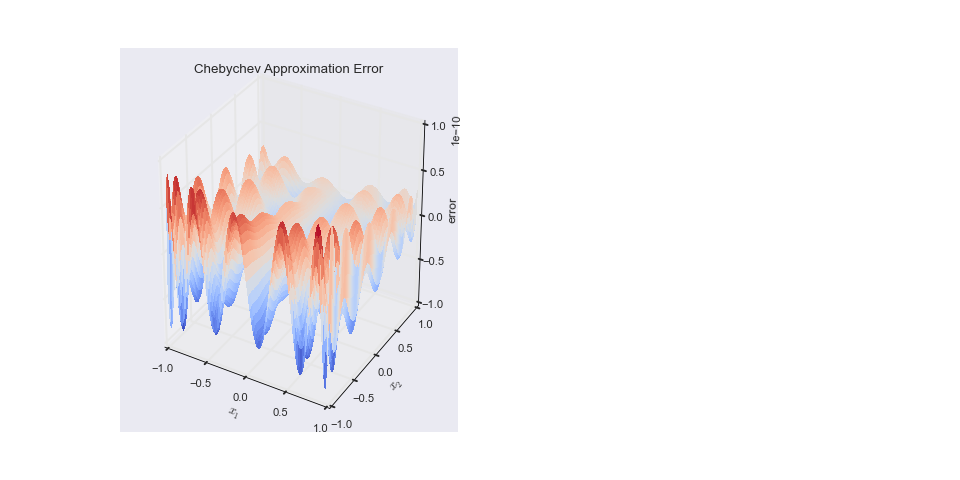

In [14]:
nplot = [101, 101]         # chose grid discretization
X = nodeunif(nplot, a, b)  # generate refined grid for plotting
yapp = F(X)        # approximant values at grid nodes
yact = f(X)                      # actual function values at grid points
error = (yapp - yact).reshape(nplot)
X1, X2 = X
X1.shape = nplot
X2.shape = nplot

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X1, X2, error, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('error')
plt.title('Chebychev Approximation Error')
fig.show()

* The plot indicates that an order 11 by 11 Chebychev approximation scheme produces approximation errors no bigger in magnitude than $10^{-10}$.

In [ ]:
'''
# Let us repeat the approximation exercise, this time constructing an order
# 21 by 21 cubic spline approximation scheme:
n = [21 21]                          # order of approximation
basis = fundefn('spli',n,a,b)        # define basis
c = funfitf(basis,@f)                # compute basis coefficients
yapp = funeval(c,basis,xgrid)        # approximant values at grid nodes
error = reshape(yapp-yact,nplot(1),nplot(2))
figure surf(xcoord{1},xcoord{2},error,'FaceColor','interp','EdgeColor','interp')
xlabel('x1') ylabel('x2') zlabel('error')
title('Cubic Spline Approximation Error')
# The plot indicates that an order 21 by 21 cubic spline approximation
# scheme produces approximation errors no bigger in magnitude than 1x10^-6.
'''